# check the output of mdc_main

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
modelname = 'smearing_ksize5-5_channels64_relu'
with h5py.File(f'./model/{modelname}/ds1/bg.hdf', 'r') as fo:
    stat = fo['stat'][:]
print(f'Background: {len(stat)}')

with h5py.File(f'./model/{modelname}/ds1/fg.hdf', 'r') as fo:
    stat = fo['stat'][:]
print(f'Foreground: {len(stat)}')

Background: 31060
Foreground: 62060


In [ ]:
with h5py.File(f'./model/{modelname}/ds1/eval.hdf', 'r') as fo:
    sensitive_distance = fo['sensitive-distance'][:]
    far = fo['far'][:]
    false_positives = fo['false-positives'][:]

far_ref_list = [1, 10, 100]
month = 86400 * 30
for far_ref in far_ref_list:
    k = np.argmin(abs(far * month - far_ref))
    print('='*50)
    print(f'FAR = {far_ref} [/month]')
    print(f'sensitive distance = {sensitive_distance[k]} [Mpc]')
    print(f'(check consistency {far[k] * month}, {far_ref})')

month = 86400 * 30
plt.figure()
plt.plot(far * month, sensitive_distance)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlim([1, 1000])
plt.xlabel('FAR [1/month]')
plt.ylabel('Sensitive distance [Mpc]')
plt.ylim([0, 3500])
plt.grid()
plt.tight_layout()
plt.show()

FAR = 1 [/month]
sensitive distance = 2428.101899781181 [Mpc]
(check consistency 0.9999999999999999, 1)
FAR = 10 [/month]
sensitive distance = 2581.846513324953 [Mpc]
(check consistency 10.0, 10)
FAR = 100 [/month]
sensitive distance = 2743.2194756057124 [Mpc]
(check consistency 100.0, 100)


# Comparison with other methods in MLGWSC-1

In [6]:
linestyles = {
    'MFCNN': '-',
    'PyCBC': '--',
    'CNN-Coinc': '-',
    'TPI_FSU_Jena': '-',
    'Virgo-AUTh': '-',
    'cWB': '--'
}

colors = {
    'MFCNN': 'C00',
    'PyCBC': 'C01',
    'CNN-Coinc': 'C02',
    'TPI_FSU_Jena': 'C03',
    'Virgo-AUTh': 'C04',
    'cWB': 'C05'
}

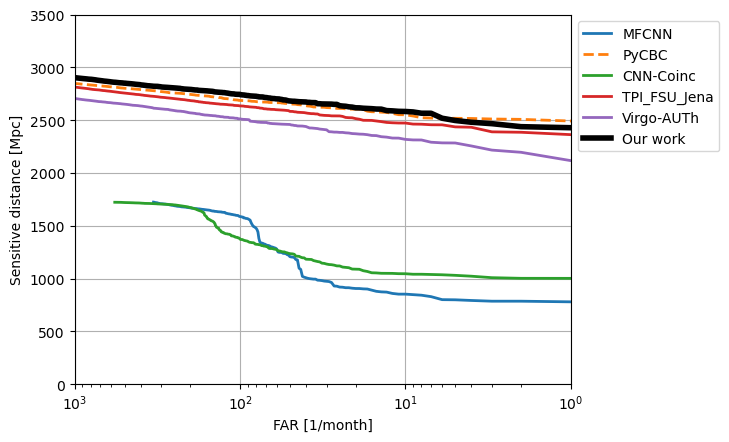

In [ ]:
month = 86400 * 30
dataset = 'ds1'
methodlist = ['MFCNN', 'PyCBC', 'CNN-Coinc', 'TPI_FSU_Jena', 'Virgo-AUTh']

plt.figure()
# Plot MLGWSC-1 pipelines
for method in methodlist:
    datadir = f'./data/mdc_results/results/{method}/{dataset}/'
    with h5py.File(f'{datadir}/eval.hdf', 'r') as h5file:
        far = h5file['far'][:]
        # sensitive_volume = h5file['sensitive-volume'][:]
        sensitive_distance = h5file['sensitive-distance'][:]
    plt.plot(far * month, sensitive_distance, label=method, c=colors[method], linestyle=linestyles[method], lw=2)

# Plot our work
with h5py.File(f'./model/{modelname}/{dataset}/eval.hdf', 'r') as fo:
    far = fo['far'][:]
    sensitive_distance = fo['sensitive-distance'][:]
plt.plot(far * month, sensitive_distance, lw=4, c='k', label='Our work')

plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlim([1000, 1])
plt.ylim([0, 3500])
plt.xlabel('FAR [1/month]')
plt.ylabel('Sensitive distance [Mpc]')
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig(f'./data/models/{modelname}/{dataset}/performance_comparison.pdf', bbox_inches='tight')
plt.show()